# Библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# для подбора гипер параметров в моделях
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, \
                            confusion_matrix
# метрики с функциями потерь

%matplotlib inline 
# отображает графику в юпитере
%config IPCompleter.greedy=True 
# должно ускорять работу таба

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
from sklearn.externals import joblib
# для сохранения обученных моделей

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, RidgeClassifier, \
                                 PassiveAggressiveClassifier, \
                                 LogisticRegressionCV

In [6]:
big = pd.read_csv('BIG_1', sep = '	')
big = big.drop('Unnamed: 0', axis = 1)

# Созданные функции

In [7]:
def con_mat(y_test, y_pred):
    array = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(array, index = ['-','Attack','C&C','C&C-FileDownload','C&C-HeartBeat','C&C-Mirai','C&C-Torii','DDoS', \
                                         'Okiru-Attack','Okiru','FileDownload','PartOfAHorizontalPortScan'],
                      columns = ['-','Attack','C&C','C&C-FileDownload','C&C-HeartBeat','C&C-Mirai','C&C-Torii','DDoS', \
                                 'Okiru-Attack','Okiru','FileDownload','PartOfAHorizontalPortScan'])
    plt.figure(figsize = (12,8))
    sns.heatmap(df_cm, annot=True);
# код для отображения матрицы ошибки

# Целевые признаки в исходных данных

In [1]:
from IPython.display import HTML, display

data = [['фрейм','-','PartOfAHorizontalPortScan','C&C','Attack','Okiru','DDoS','C&C-HeartBeat', \
         'PartOfAHorizontalPortScan-Attack', 'C&C-Torii','C&C-FileDownload','Okiru-Attack','FileDownload', \
         'C&C-PartOfAHorizontalPortScan','C&C-HeartBeat-Attack','C&C-HeartBeat-FileDownload','C&C-Mirai'],
        ['CTU-Honeypot-Capture-4-1',452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        ['CTU-Honeypot-Capture-5-1',1374,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        ['CTU-Honeypot-Capture-7-1',130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        ['CTU-IoT-Malware-Capture-1-1',469275,539465,8,0,0,0,0,0,0,0,0,0,0,0,0,0],
        ['CTU-IoT-Malware-Capture-3-1',4536,145597,8,5962,0,0,0,0,0,0,0,0,0,0,0,0],
        ['CTU-IoT-Malware-Capture-7-1',75955,0,0,0,11333397,39584,5778,0,0,0,0,0,0,0,0,0],
        ['CTU-IoT-Malware-Capture-8-1',2181,0,8222,0,0,0,0,0,0,0,0,0,0,0,0,0],
        ['CTU-IoT-Malware-Capture-9-1',22548,6355745,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        ['CTU-IoT-Malware-Capture-17-1',31438,27311187,0,4,13655214,13655172,6834,5,0,0,0,0,0,0,0,0],
        ['CTU-IoT-Malware-Capture-20-1',3193,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0],
        ['CTU-IoT-Malware-Capture-21-1',3272,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0],
        ['CTU-IoT-Malware-Capture-33-1',1380791,39459054,0,0,13609467,0,5278,0,0,0,0,0,0,0,0,0],
        ['CTU-IoT-Malware-Capture-34-1',1923,122,6706,0,0,14394,0,0,0,0,0,0,0,0,0,0],
        ['CTU-IoT-Malware-Capture-35-1',8262389,0,81,3,0,2185302,0,0,0,12,0,0,0,0,0,0],
        ['CTU-IoT-Malware-Capture-36-1',2663,0,0,0,13626744,0,15688,0,0,0,3,0,0,0,0,0],
        #['CTU-IoT-Malware-Capture-39-1',8,9],
        ['CTU-IoT-Malware-Capture-42-1',4420,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0],
        #['CTU-IoT-Malware-Capture-43-1',8,9],
        ['CTU-IoT-Malware-Capture-44-1',211,0,14,0,0,1,0,0,0,11,0,0,0,0,0],
        ['CTU-IoT-Malware-Capture-48-1',3734,3386119,0,2752,0,0,0,0,0,0,0,0,888,834,11,0],
        ['CTU-IoT-Malware-Capture-49-1',3665,5404959,1922,0,0,0,0,0,0,1,0,14,0,0,0,0],
        ['CTU-IoT-Malware-Capture-52-1',1794,19779563,6,0,0,0,0,0,0,12,0,0,0,0,0,2],
        ['CTU-IoT-Malware-Capture-60-1',2476,0,0,0,0,3578457,95,0,0,0,0,0,0,0,0,0],]

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

фрейм,-,PartOfAHorizontalPortScan,C&C,Attack,Okiru,DDoS,C&C-HeartBeat,PartOfAHorizontalPortScan-Attack,C&C-Torii,C&C-FileDownload,Okiru-Attack,FileDownload,C&C-PartOfAHorizontalPortScan,C&C-HeartBeat-Attack,C&C-HeartBeat-FileDownload,C&C-Mirai
CTU-Honeypot-Capture-4-1,452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CTU-Honeypot-Capture-5-1,1374,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CTU-Honeypot-Capture-7-1,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CTU-IoT-Malware-Capture-1-1,469275,539465,8,0,0,0,0,0,0,0,0,0,0,0,0,0
CTU-IoT-Malware-Capture-3-1,4536,145597,8,5962,0,0,0,0,0,0,0,0,0,0,0,0
CTU-IoT-Malware-Capture-7-1,75955,0,0,0,11333397,39584,5778,0,0,0,0,0,0,0,0,0
CTU-IoT-Malware-Capture-8-1,2181,0,8222,0,0,0,0,0,0,0,0,0,0,0,0,0
CTU-IoT-Malware-Capture-9-1,22548,6355745,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CTU-IoT-Malware-Capture-17-1,31438,27311187,0,4,13655214,13655172,6834,5,0,0,0,0,0,0,0,0
CTU-IoT-Malware-Capture-20-1,3193,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0


# Создание единого фрейма для дальнейшей работы

In [17]:
big = pd.read_csv('IoT/CTU-Honeypot-Capture-4-1/conn.log.labeled', sep = '	')
big['time'] = pd.to_datetime(big['time'],unit='s')
big.shape

(452, 23)

In [18]:
df_new = pd.read_csv('IoT/CTU-Honeypot-Capture-5-1/conn.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(1826, 23)

In [19]:
df_new = pd.read_csv('IoT/CTU-Honeypot-Capture-7-1/conn.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(1956, 23)

In [20]:
df_new = pd.read_csv('IoT/CTU-IoT-Malware-Capture-1-1/conn.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(1010704, 23)

In [21]:
df_new = pd.read_csv('IoT/CTU-IoT-Malware-Capture-3-1/conn.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(1166807, 23)

In [22]:
df_new = pd.read_csv('IoT/CTU-IoT-Malware-Capture-8-1/conn.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(1177210, 23)

In [23]:
df_new = pd.read_csv('IoT/CTU-IoT-Malware-Capture-20-1/conn.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(1180419, 23)

In [24]:
df_new = pd.read_csv('IoT/CTU-IoT-Malware-Capture-21-1/conn.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(1183705, 23)

In [25]:
df_new = pd.read_csv('IoT/CTU-IoT-Malware-Capture-34-1/conn.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(1206850, 23)

In [26]:
df_new = pd.read_csv('IoT/CTU-IoT-Malware-Capture-42-1/conn.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(1211276, 23)

In [27]:
df_new = pd.read_csv('IoT/CTU-IoT-Malware-Capture-44-1/conn.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(1211513, 23)

In [28]:
df_new = pd.read_csv('IoT/CTU-IoT-Malware-Capture-60-1/conn.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(4792541, 23)

In [29]:
big['string.5'].value_counts()

DDoS                         3592852
PartOfAHorizontalPortScan     685184
-                             493443
C&C                            14958
Attack                          5962
C&C-HeartBeat                     95
C&C-Torii                         30
C&C-FileDownload                  14
FileDownload                       3
Name: string.5, dtype: int64

In [31]:
# код для создания первой части (файла) большого файла
f = open('IoT/CTU-IoT-Malware-Capture-17-1/17_1.log.labeled', 'r')
g = open('IoT/CTU-IoT-Malware-Capture-17-1/17_0.log.labeled', 'w')
sc = 0
for line in f:
    if sc < 1000001:
        g.write(line)
        sc += 1
        continue
    if 1000001 == sc:
        break
f.close()
g.close()

In [32]:
df_new = pd.read_csv('IoT/CTU-IoT-Malware-Capture-17-1/17_0.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(5792541, 23)

In [33]:
big['string.5'].value_counts()

DDoS                         3842590
PartOfAHorizontalPortScan    1184882
-                             493988
Okiru                         249903
C&C                            14958
Attack                          5962
C&C-HeartBeat                    211
C&C-Torii                         30
C&C-FileDownload                  14
FileDownload                       3
Name: string.5, dtype: int64

In [37]:
# код для создания первой части (файла) большого файла
f = open('IoT/CTU-IoT-Malware-Capture-7-1/conn.log.labeled', 'r')
g = open('IoT/CTU-IoT-Malware-Capture-7-1/7_0.log.labeled', 'w')
sc = 0
for line in f:
    if sc < 1000001:
        g.write(line)
        sc += 1
        continue
    if 1000001 == sc:
        break
f.close()
g.close()

In [38]:
df_new = pd.read_csv('IoT/CTU-IoT-Malware-Capture-7-1/7_0.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(6792541, 23)

In [39]:
big['string.5'].value_counts()

DDoS                         3842590
Okiru                        1247488
PartOfAHorizontalPortScan    1184882
-                             495280
C&C                            14958
Attack                          5962
C&C-HeartBeat                   1334
C&C-Torii                         30
C&C-FileDownload                  14
FileDownload                       3
Name: string.5, dtype: int64

In [40]:
# код для создания первой части (файла) большого файла
f = open('IoT/CTU-IoT-Malware-Capture-9-1/conn.log.labeled', 'r')
g = open('IoT/CTU-IoT-Malware-Capture-9-1/9_0.log.labeled', 'w')
sc = 0
for line in f:
    if sc < 1000001:
        g.write(line)
        sc += 1
        continue
    if 1000001 == sc:
        break
f.close()
g.close()

In [41]:
df_new = pd.read_csv('IoT/CTU-IoT-Malware-Capture-9-1/9_0.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(7792541, 23)

In [42]:
big['string.5'].value_counts()

DDoS                         3842590
PartOfAHorizontalPortScan    2180464
Okiru                        1247488
-                             499698
C&C                            14958
Attack                          5962
C&C-HeartBeat                   1334
C&C-Torii                         30
C&C-FileDownload                  14
FileDownload                       3
Name: string.5, dtype: int64

In [43]:
# код для создания первой части (файла) большого файла
f = open('IoT/CTU-IoT-Malware-Capture-33-1/conn.log.labeled', 'r')
g = open('IoT/CTU-IoT-Malware-Capture-33-1/33_0.log.labeled', 'w')
sc = 0
for line in f:
    if sc < 1000001:
        g.write(line)
        sc += 1
        continue
    if 1000001 == sc:
        break
f.close()
g.close()

In [44]:
df_new = pd.read_csv('IoT/CTU-IoT-Malware-Capture-33-1/33_0.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(8792541, 23)

In [45]:
big['string.5'].value_counts()

DDoS                         3842590
PartOfAHorizontalPortScan    2904743
Okiru                        1497646
-                             525179
C&C                            14958
Attack                          5962
C&C-HeartBeat                   1416
C&C-Torii                         30
C&C-FileDownload                  14
FileDownload                       3
Name: string.5, dtype: int64

In [46]:
# код для создания первой части (файла) большого файла
f = open('IoT/CTU-IoT-Malware-Capture-36-1/conn.log.labeled', 'r')
g = open('IoT/CTU-IoT-Malware-Capture-36-1/36_0.log.labeled', 'w')
sc = 0
for line in f:
    if sc < 1000001:
        g.write(line)
        sc += 1
        continue
    if 1000001 == sc:
        break
f.close()
g.close()

In [47]:
df_new = pd.read_csv('IoT/CTU-IoT-Malware-Capture-36-1/36_0.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(9792541, 23)

In [48]:
big['string.5'].value_counts()

DDoS                         3842590
PartOfAHorizontalPortScan    2904743
Okiru                        2496307
-                             525367
C&C                            14958
Attack                          5962
C&C-HeartBeat                   2564
C&C-Torii                         30
C&C-FileDownload                  14
Okiru-Attack                       3
FileDownload                       3
Name: string.5, dtype: int64

In [49]:
# код для создания первой части (файла) большого файла
f = open('IoT/CTU-IoT-Malware-Capture-52-1/conn.log.labeled', 'r')
g = open('IoT/CTU-IoT-Malware-Capture-52-1/52_0.log.labeled', 'w')
sc = 0
for line in f:
    if sc < 1000001:
        g.write(line)
        sc += 1
        continue
    if 1000001 == sc:
        break
f.close()
g.close()

In [50]:
df_new = pd.read_csv('IoT/CTU-IoT-Malware-Capture-52-1/52_0.log.labeled', sep = '	')
df_new['time'] = pd.to_datetime(df_new['time'],unit='s')
df_new['count']=df_new['count'].astype(object)
df_new['count.1']=df_new['count.1'].astype(object)
df_new['interval']=df_new['interval'].astype(object)
big = big.merge(df_new, how='outer')
big.shape

(10792541, 23)

In [51]:
big['string.5'].value_counts()

PartOfAHorizontalPortScan    3904635
DDoS                         3842590
Okiru                        2496307
-                             525456
C&C                            14964
Attack                          5962
C&C-HeartBeat                   2564
C&C-Torii                         30
C&C-FileDownload                  26
FileDownload                       3
Okiru-Attack                       3
C&C-Mirai                          1
Name: string.5, dtype: int64

In [63]:
big.to_csv('BIG', sep = '	')

# Анализ полученного фрейма

In [74]:
plt.rcParams['figure.figsize'] = [8, 8]

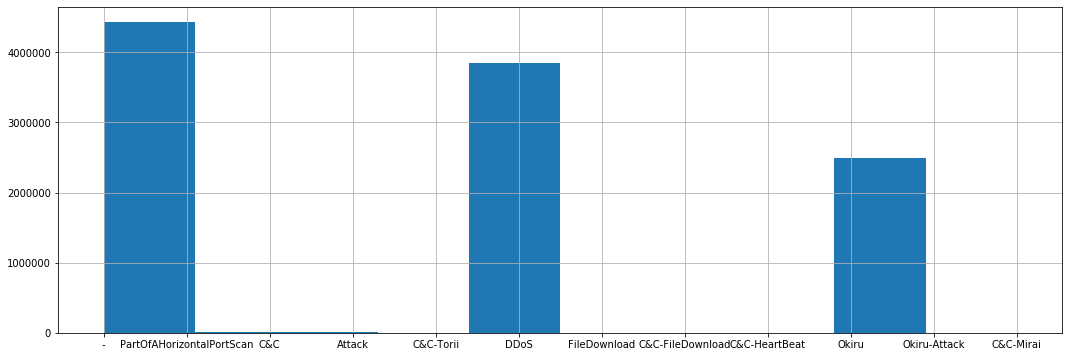

In [60]:
big['string.5'].hist();

In [64]:
big

,time,string,addr,port,addr.1,port.1,enum,string.1,interval,count,...,bool.1,count.2,string.3,count.3,count.4,count.5,count.6,set[string],string.4,string.5
0,2018-10-25 12:08:22.538640022,CGm6jB4dXK71ZDWUDh,192.168.1.132,58687,216.239.35.4,123,udp,-,0.114184,48,...,-,0,Dd,1,76,1,76,-,benign,-
1,2018-10-25 12:06:37.400158882,CnaDAG3n5r8eiG4su2,192.168.1.132,1900,239.255.255.250,1900,udp,-,160.367579,7536,...,-,0,D,24,8208,0,0,-,benign,-
2,2018-10-25 12:09:45.734089136,CUrxU238nt0m6yTgKf,192.168.1.132,32893,216.239.35.8,123,udp,-,0.016986,48,...,-,0,Dd,1,76,1,76,-,benign,-
3,2018-10-25 12:17:11.302624941,CGQf8t1kjdxB5PHXL4,192.168.1.132,53395,2.16.60.82,443,tcp,-,0.003497,0,...,-,0,ShAFf,5,212,3,144,-,benign,-
4,2018-10-25 12:17:11.265405178,CUo9DH2QDnCaBIGjkg,192.168.1.132,52801,192.168.1.1,53,udp,dns,0.036724,34,...,-,0,Dd,1,62,1,339,-,benign,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10792536,2019-03-08 13:10:06.435873032,C2fgaa2EuCEWfAedb5,192.168.1.197,63420,146.215.252.66,23,tcp,-,6e-06,0,...,-,0,S,2,80,0,0,-,Malicious,PartOfAHorizontalPortScan
10792537,2019-03-08 13:10:06.435881138,CVG6Vlcv6SEyx0rYb,192.168.1.197,63420,165.133.152.183,23,tcp,-,2e-06,0,...,-,0,S,2,80,0,0,-,Malicious,PartOfAHorizontalPortScan
10792538,2019-03-08 13:10:06.435884953,ChW53QIrMjqnGtmDl,192.168.1.197,63420,171.153.103.80,23,tcp,-,2e-06,0,...,-,0,S,2,80,0,0,-,Malicious,PartOfAHorizontalPortScan
10792539,2019-03-08 13:10:06.435889006,CcwTuv4y8TTNZvJb2k,192.168.1.197,63420,185.134.125.90,23,tcp,-,2e-06,0,...,-,0,S,2,80,0,0,-,Malicious,PartOfAHorizontalPortScan


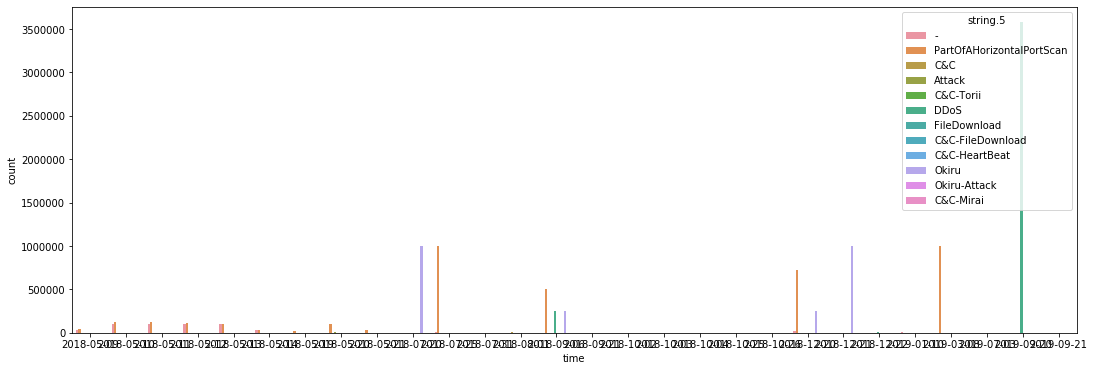

In [65]:
date = big['time'].apply(lambda x: x.date()).sort_values()
sns.countplot(x = date, hue = 'string.5', data = big);

In [66]:
big.describe()

,port,port.1,count.2,count.3,count.4,count.5,count.6
count,1.079254e+07,1.079254e+07,1.079254e+07,1.079254e+07,1.079254e+07,1.079254e+07,1.079254e+07
mean,3.412771e+04,3.382816e+04,1.980479e-02,2.586435e+01,1.112774e+03,5.518274e-02,3.662974e+01
std,1.904572e+04,2.580571e+04,1.297915e+01,2.653295e+04,1.044566e+06,7.320815e+01,1.064325e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.783200e+04,8.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.609700e+04,3.721500e+04,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
75%,4.693000e+04,6.233600e+04,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00
max,6.553500e+04,6.553500e+04,2.027200e+04,6.602735e+07,1.914793e+09,2.394840e+05,3.496187e+08


In [67]:
big.corr()

,port,port.1,count.2,count.3,count.4,count.5,count.6
port,1.000000,-0.247391,0.001492,0.000664,0.000614,0.000457,0.000256
port.1,-0.247391,1.000000,-0.001994,-0.001083,-0.001079,-0.000950,-0.000444
count.2,0.001492,-0.001994,1.000000,0.000033,0.000038,0.013098,0.001898
count.3,0.000664,-0.001083,0.000033,1.000000,0.804756,0.001434,0.001420
count.4,0.000614,-0.001079,0.000038,0.804756,1.000000,0.001945,0.001909
count.5,0.000457,-0.000950,0.013098,0.001434,0.001945,1.000000,0.996272
count.6,0.000256,-0.000444,0.001898,0.001420,0.001909,0.996272,1.000000


# Обработка фрейма (удаление/изменение признаков)

In [69]:
big['string'].value_counts()

CKsBID3L5r4TDTAgLi    1
COBRXf3vT7daNx9HEe    1
ChG32a3TlbH89r7MWa    1
Cx9CEe1m4fzOYfNNt     1
CHym6G8EsWgEInLc8     1
                     ..
C28IXH2gMvqKKjfOu3    1
CZBuNq11gripYd2TS     1
C1iVRs3ZwT2nM6Lnf7    1
CmOgfv4AihTtPUWaTi    1
Cz8gDt1fjLoAFCNpHi    1
Name: string, Length: 10792541, dtype: int64

In [70]:
big = big.drop('string', axis = 1)
# признак с хешем, у каждого наблюдения свой, не приносит пользы модели

In [71]:
day = big['time'].apply(lambda x: x.timetuple().tm_yday)
hour = big['time'].apply(lambda x: x.hour)

day = pd.DataFrame(day)
hour = pd.DataFrame(hour)

big.insert(1, 'hour', hour)
big.insert(1, 'day', day)
big = big.drop('time', axis = 1)
# преобразуем дату в два новых признака, поряд дня в году и час

In [72]:
big

,day,hour,addr,port,addr.1,port.1,enum,string.1,interval,count,...,bool.1,count.2,string.3,count.3,count.4,count.5,count.6,set[string],string.4,string.5
0,298,12,192.168.1.132,58687,216.239.35.4,123,udp,-,0.114184,48,...,-,0,Dd,1,76,1,76,-,benign,-
1,298,12,192.168.1.132,1900,239.255.255.250,1900,udp,-,160.367579,7536,...,-,0,D,24,8208,0,0,-,benign,-
2,298,12,192.168.1.132,32893,216.239.35.8,123,udp,-,0.016986,48,...,-,0,Dd,1,76,1,76,-,benign,-
3,298,12,192.168.1.132,53395,2.16.60.82,443,tcp,-,0.003497,0,...,-,0,ShAFf,5,212,3,144,-,benign,-
4,298,12,192.168.1.132,52801,192.168.1.1,53,udp,dns,0.036724,34,...,-,0,Dd,1,62,1,339,-,benign,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10792536,67,13,192.168.1.197,63420,146.215.252.66,23,tcp,-,6e-06,0,...,-,0,S,2,80,0,0,-,Malicious,PartOfAHorizontalPortScan
10792537,67,13,192.168.1.197,63420,165.133.152.183,23,tcp,-,2e-06,0,...,-,0,S,2,80,0,0,-,Malicious,PartOfAHorizontalPortScan
10792538,67,13,192.168.1.197,63420,171.153.103.80,23,tcp,-,2e-06,0,...,-,0,S,2,80,0,0,-,Malicious,PartOfAHorizontalPortScan
10792539,67,13,192.168.1.197,63420,185.134.125.90,23,tcp,-,2e-06,0,...,-,0,S,2,80,0,0,-,Malicious,PartOfAHorizontalPortScan


In [73]:
big.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10792541 entries, 0 to 10792540
Data columns (total 23 columns):
day            int64
hour           int64
addr           object
port           int64
addr.1         object
port.1         int64
enum           object
string.1       object
interval       object
count          object
count.1        object
string.2       object
bool           object
bool.1         object
count.2        int64
string.3       object
count.3        int64
count.4        int64
count.5        int64
count.6        int64
set[string]    object
string.4       object
string.5       object
dtypes: int64(9), object(14)
memory usage: 1.9+ GB


In [74]:
big['bool'].value_counts()

-    10792541
Name: bool, dtype: int64

In [75]:
big['bool.1'].value_counts()

-    10792541
Name: bool.1, dtype: int64

In [76]:
big['string.4'].value_counts()

Malicious    10267085
Benign         523500
benign           1956
Name: string.4, dtype: int64

In [77]:
big = big.drop('bool', axis = 1)
big = big.drop('bool.1', axis = 1)
big = big.drop('string.4', axis = 1)
# значения признаков bool и bool.1 одинаковы для всех наблюдений
# признак string.4 имеет частичный ответ ожидаемый от модели

In [79]:
big['interval'].value_counts()

-           8470907
2e-06       1241646
6e-06        295326
5e-06        210418
1e-06        164943
             ...   
0.218373          1
0.105762          1
0.437690          1
0.027226          1
0.150669          1
Name: interval, Length: 51232, dtype: int64

In [80]:
big['count.1'].value_counts()

-        8470907
0        1999949
0         287074
48         13454
45          2809
          ...   
464            1
479            1
16438          1
5463           1
794            1
Name: count.1, Length: 798, dtype: int64

In [81]:
big['count'].value_counts()

-        8470907
0        1999540
0         279953
48         13478
589         5841
          ...   
1104           1
10217          1
2376           1
5415           1
28260          1
Name: count, Length: 579, dtype: int64

In [95]:
big.loc[big['interval'] == '-', 'interval'] = '-1'
big.loc[big['count'] == '-', 'count'] = '-1'
big.loc[big['count.1'] == '-', 'count.1'] = '-1'

big['interval'] = big['interval'].astype(float)
big['count'] = big['count'].astype(int)
big['count.1'] = big['count.1'].astype(int)
# заменяем пропуски на значение -1 и приводим признаки к числовому типу

In [96]:
big

,day,hour,addr,port,addr.1,port.1,enum,string.1,interval,count,count.1,string.2,count.2,string.3,count.3,count.4,count.5,count.6,set[string],string.5
0,298,12,192.168.1.132,58687,216.239.35.4,123,udp,-,0.114184,48,48,SF,0,Dd,1,76,1,76,-,-
1,298,12,192.168.1.132,1900,239.255.255.250,1900,udp,-,160.367579,7536,0,S0,0,D,24,8208,0,0,-,-
2,298,12,192.168.1.132,32893,216.239.35.8,123,udp,-,0.016986,48,48,SF,0,Dd,1,76,1,76,-,-
3,298,12,192.168.1.132,53395,2.16.60.82,443,tcp,-,0.003497,0,0,SF,0,ShAFf,5,212,3,144,-,-
4,298,12,192.168.1.132,52801,192.168.1.1,53,udp,dns,0.036724,34,311,SF,0,Dd,1,62,1,339,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10792536,67,13,192.168.1.197,63420,146.215.252.66,23,tcp,-,0.000006,0,0,S0,0,S,2,80,0,0,-,PartOfAHorizontalPortScan
10792537,67,13,192.168.1.197,63420,165.133.152.183,23,tcp,-,0.000002,0,0,S0,0,S,2,80,0,0,-,PartOfAHorizontalPortScan
10792538,67,13,192.168.1.197,63420,171.153.103.80,23,tcp,-,0.000002,0,0,S0,0,S,2,80,0,0,-,PartOfAHorizontalPortScan
10792539,67,13,192.168.1.197,63420,185.134.125.90,23,tcp,-,0.000002,0,0,S0,0,S,2,80,0,0,-,PartOfAHorizontalPortScan


In [97]:
big.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10792541 entries, 0 to 10792540
Data columns (total 20 columns):
day            int64
hour           int64
addr           object
port           int64
addr.1         object
port.1         int64
enum           object
string.1       object
interval       float64
count          int32
count.1        int32
string.2       object
count.2        int64
string.3       object
count.3        int64
count.4        int64
count.5        int64
count.6        int64
set[string]    object
string.5       object
dtypes: float64(1), int32(2), int64(9), object(8)
memory usage: 1.6+ GB


In [99]:
labelencoder = LabelEncoder()

In [101]:
big["addr"] = labelencoder.fit_transform(big["addr"])
big["addr.1"] = labelencoder.fit_transform(big["addr.1"])
big["enum"] = labelencoder.fit_transform(big["enum"])
big["string.1"] = labelencoder.fit_transform(big["string.1"])
big["string.2"] = labelencoder.fit_transform(big["string.2"])
big["string.3"] = labelencoder.fit_transform(big["string.3"])
big["set[string]"] = labelencoder.fit_transform(big["set[string]"])
big["string.5"] = labelencoder.fit_transform(big["string.5"])
# преобразуем качественные признаки в числовые лабел энкодером (каждому значению признака присваиваем число)

In [102]:
big

,day,hour,addr,port,addr.1,port.1,enum,string.1,interval,count,count.1,string.2,count.2,string.3,count.3,count.4,count.5,count.6,set[string],string.5
0,298,12,7435,58687,4106478,123,2,0,0.114184,48,48,10,0,15,1,76,1,76,1,0
1,298,12,7435,1900,4347631,1900,2,0,160.367579,7536,0,6,0,7,24,8208,0,0,1,0
2,298,12,7435,32893,4106479,123,2,0,0.016986,48,48,10,0,15,1,76,1,76,1,0
3,298,12,7435,53395,3436559,443,1,0,0.003497,0,0,10,0,142,5,212,3,144,1,0
4,298,12,7435,52801,2903457,53,2,2,0.036724,34,311,10,0,15,1,62,1,339,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10792536,67,13,7438,63420,1261530,23,1,0,0.000006,0,0,6,0,40,2,80,0,0,1,11
10792537,67,13,7438,63420,2135393,23,1,0,0.000002,0,0,6,0,40,2,80,0,0,1,11
10792538,67,13,7438,63420,2317649,23,1,0,0.000002,0,0,6,0,40,2,80,0,0,1,11
10792539,67,13,7438,63420,2694905,23,1,0,0.000002,0,0,6,0,40,2,80,0,0,1,11


In [103]:
big.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10792541 entries, 0 to 10792540
Data columns (total 20 columns):
day            int64
hour           int64
addr           int64
port           int64
addr.1         int64
port.1         int64
enum           int64
string.1       int64
interval       float64
count          int32
count.1        int32
string.2       int64
count.2        int64
string.3       int64
count.3        int64
count.4        int64
count.5        int64
count.6        int64
set[string]    int64
string.5       int32
dtypes: float64(1), int32(3), int64(16)
memory usage: 1.6 GB


In [104]:
big.to_csv('BIG_1', sep = '	')

# Обучение классических моделей

In [8]:
y = big['string.5']
x = big.drop('string.5', axis = 1)

In [9]:
x

,day,hour,addr,port,addr.1,port.1,enum,string.1,interval,count,count.1,string.2,count.2,string.3,count.3,count.4,count.5,count.6,set[string]
0,298,12,7435,58687,4106478,123,2,0,0.114184,48,48,10,0,15,1,76,1,76,1
1,298,12,7435,1900,4347631,1900,2,0,160.367579,7536,0,6,0,7,24,8208,0,0,1
2,298,12,7435,32893,4106479,123,2,0,0.016986,48,48,10,0,15,1,76,1,76,1
3,298,12,7435,53395,3436559,443,1,0,0.003497,0,0,10,0,142,5,212,3,144,1
4,298,12,7435,52801,2903457,53,2,2,0.036724,34,311,10,0,15,1,62,1,339,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10792536,67,13,7438,63420,1261530,23,1,0,0.000006,0,0,6,0,40,2,80,0,0,1
10792537,67,13,7438,63420,2135393,23,1,0,0.000002,0,0,6,0,40,2,80,0,0,1
10792538,67,13,7438,63420,2317649,23,1,0,0.000002,0,0,6,0,40,2,80,0,0,1
10792539,67,13,7438,63420,2694905,23,1,0,0.000002,0,0,6,0,40,2,80,0,0,1


In [10]:
y

0            0
1            0
2            0
3            0
4            0
            ..
10792536    11
10792537    11
10792538    11
10792539    11
10792540    11
Name: string.5, Length: 10792541, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size=0.7)

# Метод гауссовского наивного Байеса

In [47]:
grid_bayes = GaussianNB()

In [48]:
%%time
grid_bayes.fit(X_train, y_train)

Wall time: 1.75 s


GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
y_pred = grid_bayes.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred)

0.5955174863487073

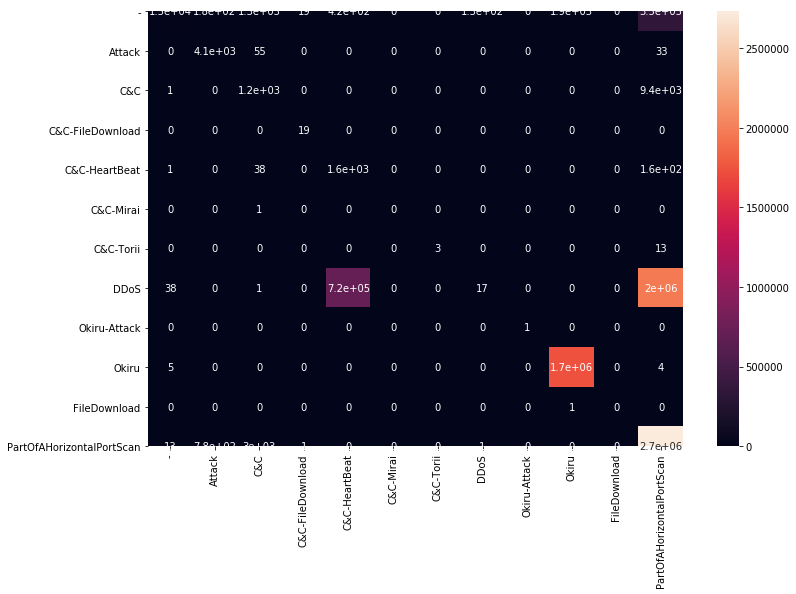

In [51]:
con_mat(y_test, y_pred)

In [139]:
joblib.dump(grid_bayes, 'grid_bayes_itog_1.pkl')

['grid_bayes_itog_1.pkl']

# Метод наивного Байеса на модели Бернулли

In [12]:
grid_ber_bayes = BernoulliNB()

In [13]:
%%time
grid_ber_bayes.fit(X_train, y_train)

Wall time: 1.61 s


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [14]:
y_pred = grid_ber_bayes.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.7450195432586446

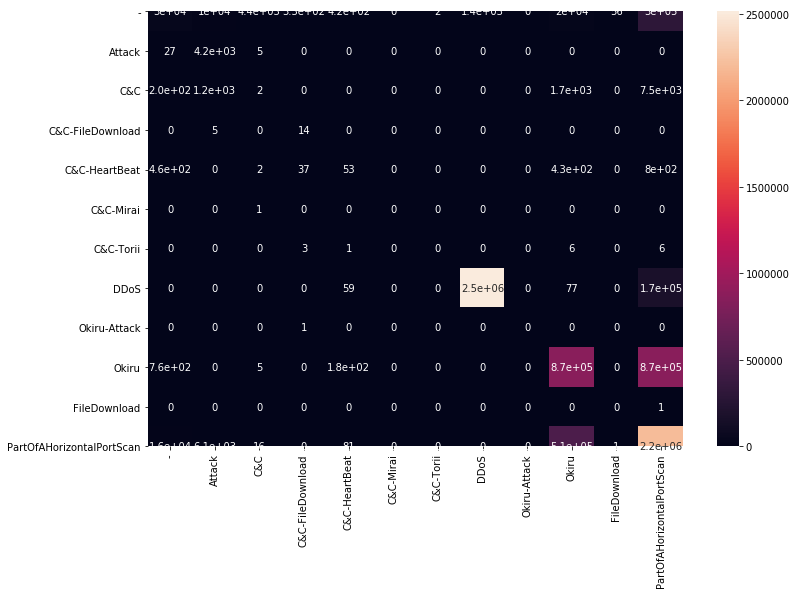

In [16]:
con_mat(y_test, y_pred)

In [72]:
joblib.dump(grid_ber_bayes, 'grid_ber_bayes_itog_1.pkl')

['grid_ber_bayes_itog_1.pkl']

# Метод KNN (К ближайших соседей)

In [16]:
grid_knn = GridSearchCV(KNeighborsClassifier(),
                        param_grid={'n_neighbors': range(1,15)},
                        cv = 5)

In [ ]:
%%time
grid_knn.fit(X_train, y_train)

C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [ ]:
grid_knn.best_estimator_

In [ ]:
accuracy_score(y_test, grid_knn.predict(X_test))

In [ ]:
# ИЗ ЗА ДЛИТЕЛЬНОГО ОБУЧЕНИЯ (БОЛЕЕ 1.5 часа) НЕ ДОДЕЛАНО

# Метод логистической регресии

In [17]:
grid_logreg = LogisticRegression(n_jobs=-1)

In [18]:
%%time
grid_logreg.fit(X_train, y_train)

C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Wall time: 18min 3s


C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = grid_logreg.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred)

0.8187105142321172

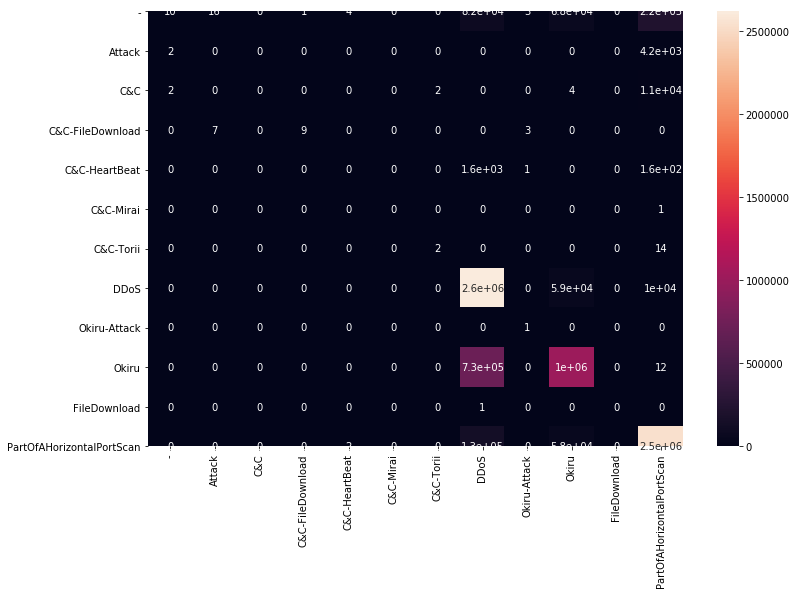

In [21]:
con_mat(y_test, y_pred)

In [32]:
joblib.dump(grid_logreg, 'grid_logreg_itog_1.pkl')

['grid_logreg_itog_1.pkl']

# Метод логистической регресии с CV (кросс валидацией)

In [46]:
grid_logregCV = LogisticRegressionCV(cv=7, n_jobs=-1)

In [ ]:
%%time
grid_logregCV.fit(X_train, y_train)

C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ALEX\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=7.
  % (min_groups, self.n_splits)), Warning)


In [1]:
# Не реализовано т.к. обучение перегружает систему и та зависает

# Метод пассивно-агрессивного классификатора

In [37]:
grid_passagg = PassiveAggressiveClassifier(n_jobs=-1)

In [43]:
%%time
grid_passagg.fit(X_train, y_train)

Wall time: 48.8 s


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=-1, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [44]:
y_pred = grid_passagg.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.391271538187947

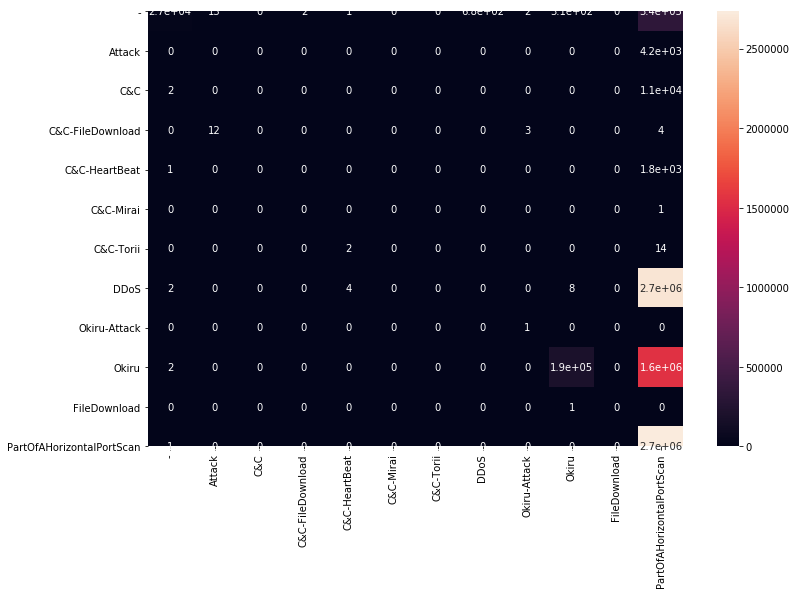

In [46]:
con_mat(y_test, y_pred)

In [33]:
joblib.dump(grid_passagg, 'grid_passagg_itog_1.pkl')

['grid_passagg_itog_1.pkl']

# Метод с использованием регрессии методом гребня

In [25]:
grid_ridge = RidgeClassifier()

In [26]:
%%time
grid_ridge.fit(X_train, y_train)

Wall time: 5.81 s


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [27]:
y_pred = grid_ridge.predict(X_test)

In [28]:
accuracy_score(y_test, grid_ridge.predict(X_test))

0.9389194574718863

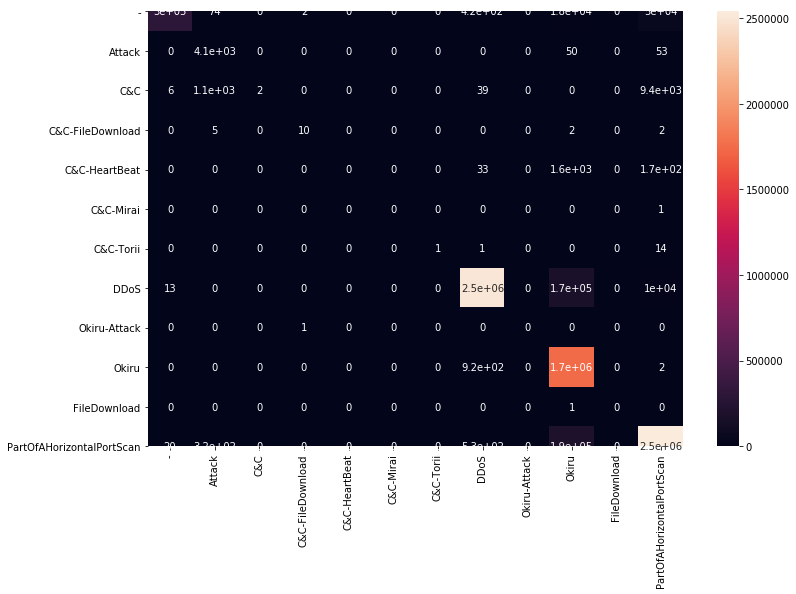

In [32]:
con_mat(y_test, y_pred)

In [44]:
joblib.dump(grid_ridge, 'grid_ridge_itog_1.pkl')

['grid_ridge_itog_1.pkl']